# METODOLOGÍA CRISP-DM
## Cross Industry Standard Process for Data Mining
### _Proceso Estándar de la Industria Cruzada para la Minería de Datos_

### Integrantes:
* Misael Gonzáles Soria
* José Carlos Barreras Maldonado
* Axel Castro Fonseca
* Guillermo Velazquez Coronado

$imagen$

# Cross Industry Standard Process for Data Mining (CRISP-DM):

Es un proceso estructurado o metodología ampliamente utilizada para la realización de proyectos de minería de datos o análisis de datos. Se compone de seis fases principales:


$ *fuente$

# 1. Entendimiento del negocio

- Esta primera fase tiene como objetivo comprender los objetivos y requisitos comerciales antes de avanzar en el proceso de análisis de datos. 
- En esta fase se define el alcance del proyecto, los objetivos comerciales, los requisitos y, finalmente,  se produce un plan de proyecto sólido.



### 1.1 Para el caso de estudio: 

**Objetivo**: Predecir la calidad del vino tinto basándose en características fisicoquímicas para ayudar a la toma de decisiones informadas sobre la producción y mejorar la calidad del producto.

**Metas**: Establecer un modelo de predicción de calidad con un alto nivel de precisión.

**Declaración del problema**: Desarrollar un modelo de predicción de calidad de vino basado en características fisicoquímicas.

# 2. Entendimiento de los datos
- Se debe recolectar y explorar los datos relevantes para el proyecto. 
- Esta etapa se centra en adquirir un entendimiento de los datos que se utilizarán en el proyecto.
- Se debe evaluar la calidad de los datos y determinar si son adecuados para el análisis

### 2.1 Recopilación de datos
- Recopilación de la base de datos que contienen información sobre las características fisicoquímicas de los vinos desde https://archive.ics.uci.edu/static/public/186/wine+quality.zip

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from zipfile import ZipFile
import os
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [47]:
subdir = "./data/"
zip_url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
zip_file = "wine+quality.zip"
white_wine_file = "winequality-white.csv"
red_wine_file = "winequality-red.csv"

In [49]:
# Descarga y Descomprime el ZIP
if not os.path.exists(zip_file):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    urllib.request.urlretrieve(zip_url, subdir + zip_file)  
    with ZipFile(subdir + zip_file, "r") as zip_ref:
        zip_ref.extractall(subdir)
    
# Leer el archivo CSV en un DataFrame
df = pd.read_csv(subdir + red_wine_file, sep=";")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2.2 Exploración de datos
- Comprensión de la estructura de los conjuntos de datos.
- Verificación de la calidad de los datos. 
- Identificación posibles problemas como valores faltantes o atípicos.


In [50]:
# Estructura de DataFrame
df.shape 

(1599, 12)

In [51]:
# Información de las características del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [52]:
# Resumen de valores faltantes
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 2.3 Análisis inicial
- Realización del análisis estadístico.
- Comprensión de las relaciones entre las características fisicoquímicas y la calidad del vino.

In [53]:
# Estadísticas descriptivas del DataFrame

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


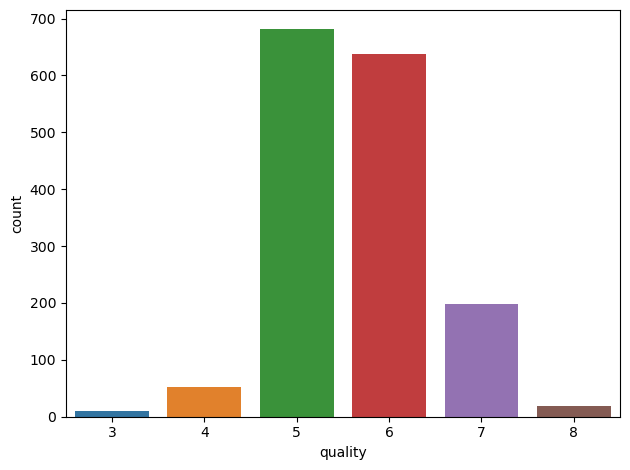

In [69]:
#checking the quality , our target variable

sns.countplot(df, x="quality")
plt.tight_layout()
plt.show()

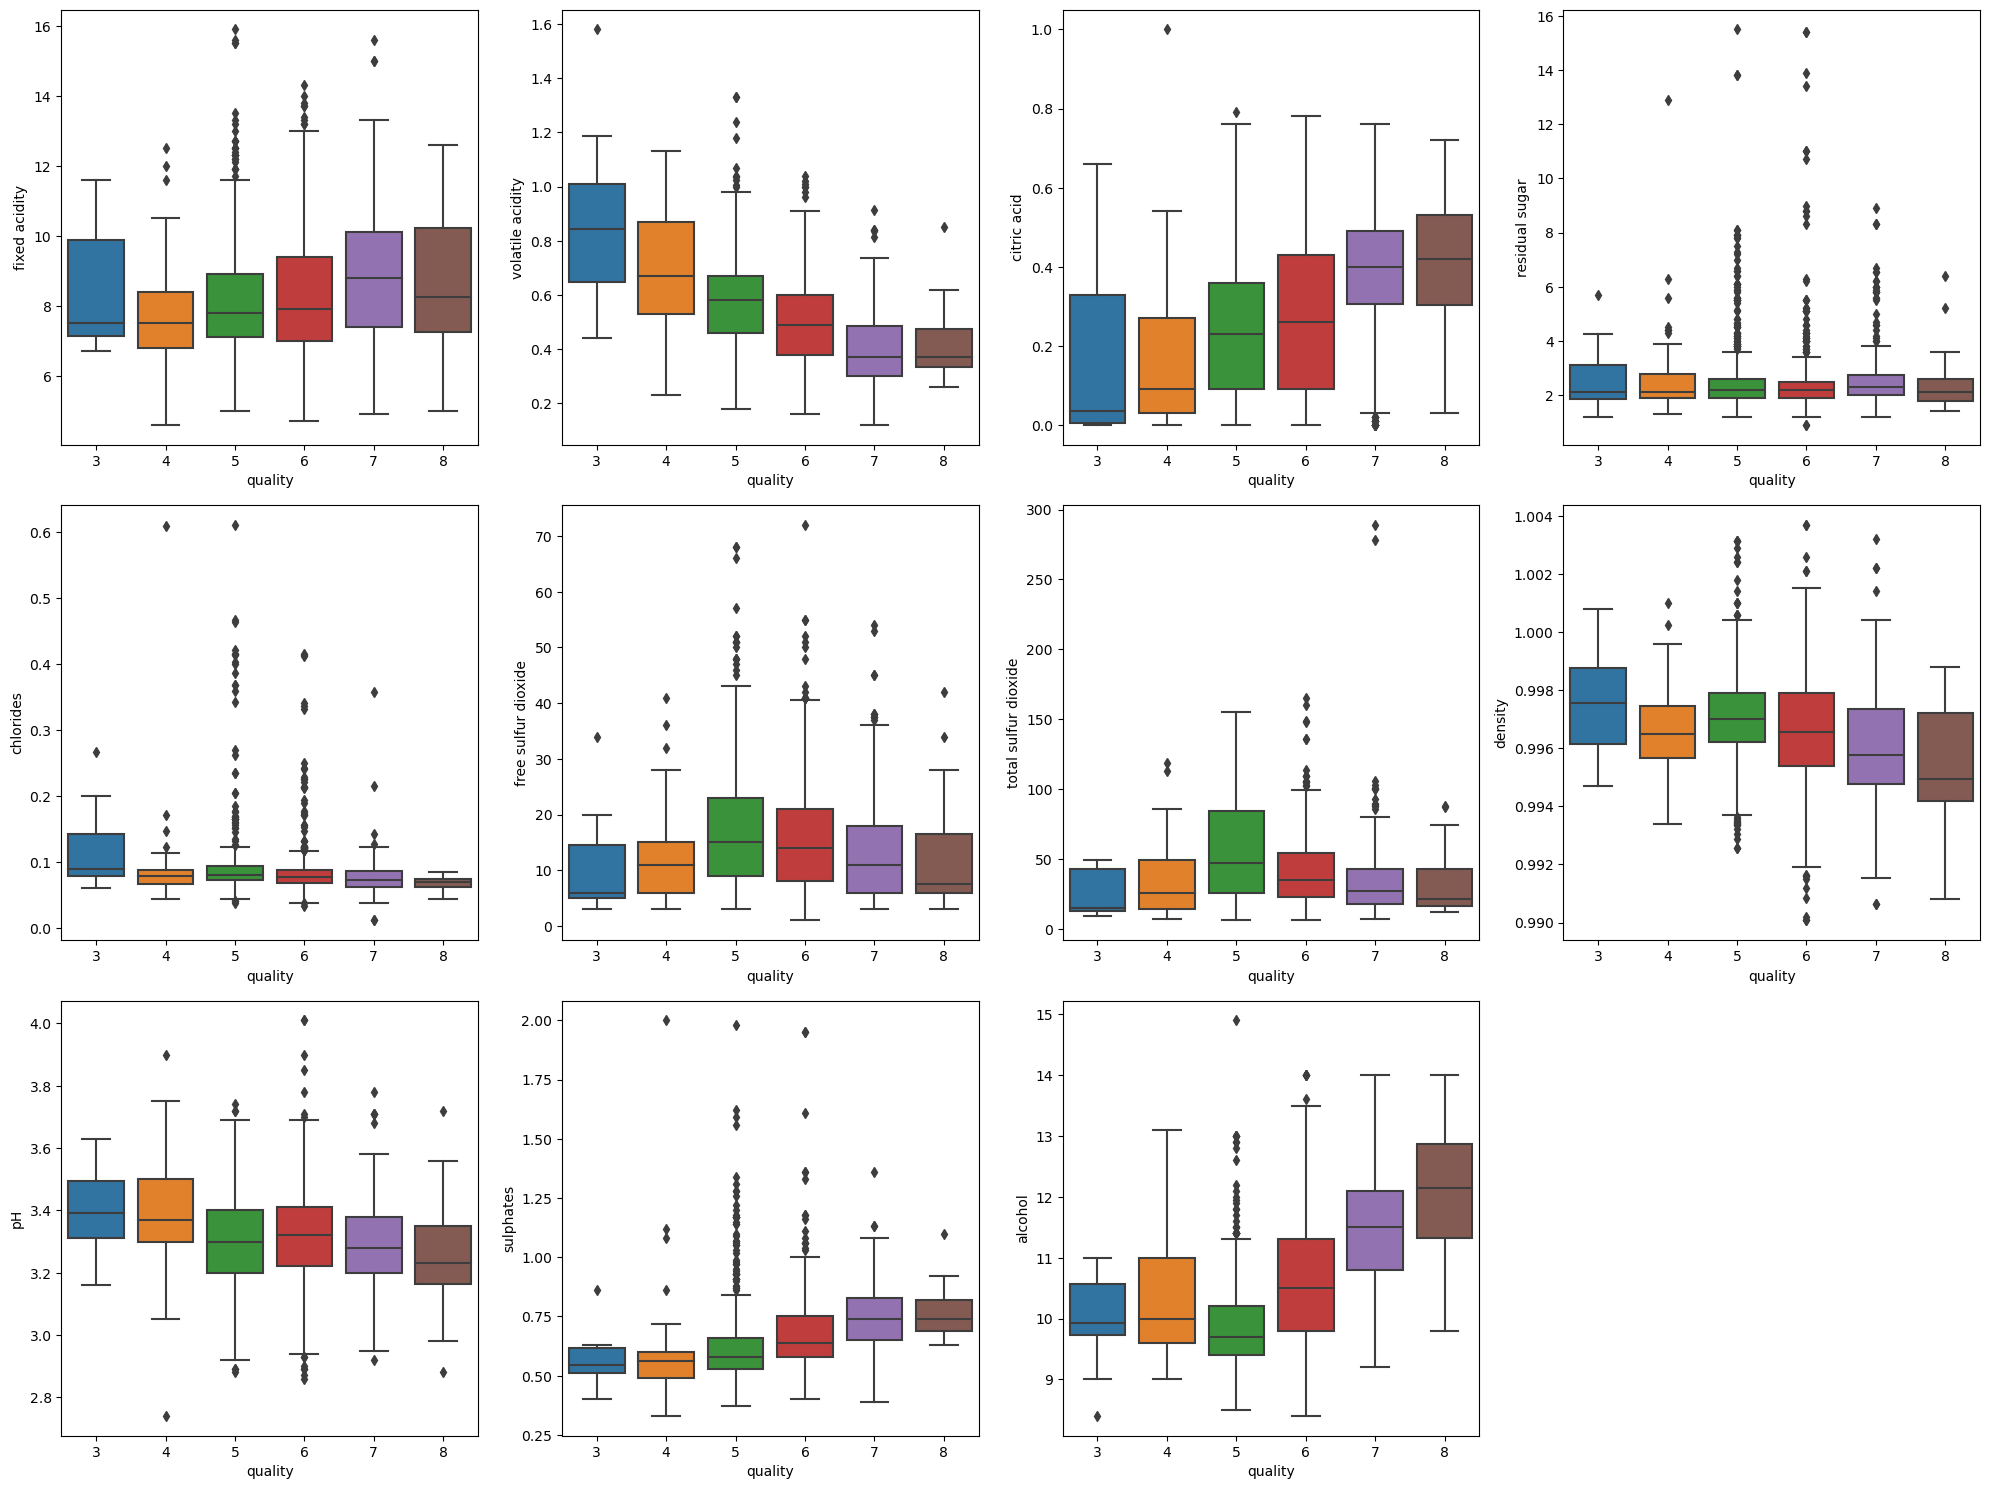

In [66]:
# Create a figure with subplots

plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1]):  # Excluye la variable dependiente
    plt.subplot(3, 4, i + 1)  
    sns.boxplot(x=df['quality'], y=df[column])  
plt.tight_layout()
plt.show()

# 3. Preparación de los datos

# 4. Modelado

# 5. Evaluación

# 6. Implementación